In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as stm
import matplotlib.pyplot as plt

In [92]:
np.random.seed(555)

In [4]:
data_fires = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [5]:
data_fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

**Зависимая переменная - area - площадь лесного пожара**

In [6]:
#переделать месяцы и дни в числовые
mdict = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
ddict = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}
data_fires['fmonth'] = data_fires['month'].apply(lambda x: mdict[x])
data_fires['fday'] = data_fires['day'].apply(lambda x: ddict[x])

In [7]:
data_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fmonth,fday
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,5
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,2
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,6
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,5
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,7


In [8]:
forfires = data_fires[data_fires.area != 0]

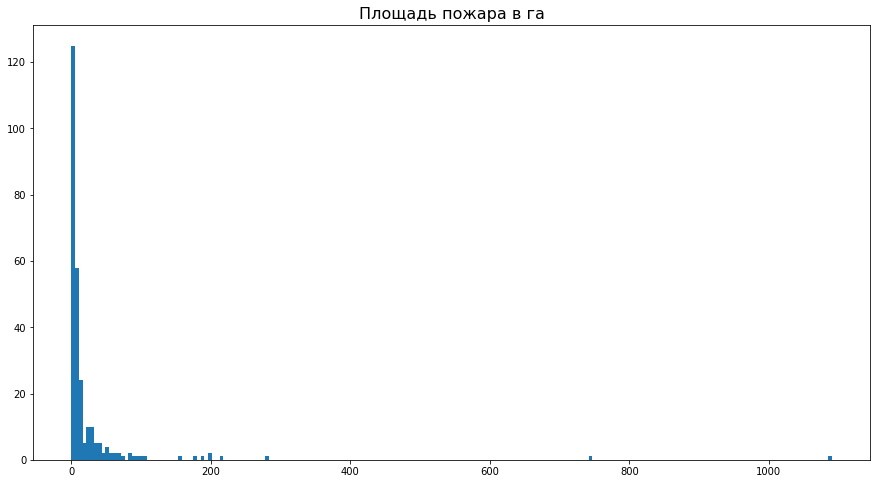

In [10]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.area, bins=200)
plt.title('Площадь пожара в га', fontdict={'fontsize':16})
plt.show()

Выборка несбалансированная, судя по зачениям целевой переменной разброс будет большим (заметны выбросы с очень высокими показателя ПЛП), попробуем снизить разброс путем логарифмирования

In [9]:
forfires['lgarea'] = np.log(forfires.area)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


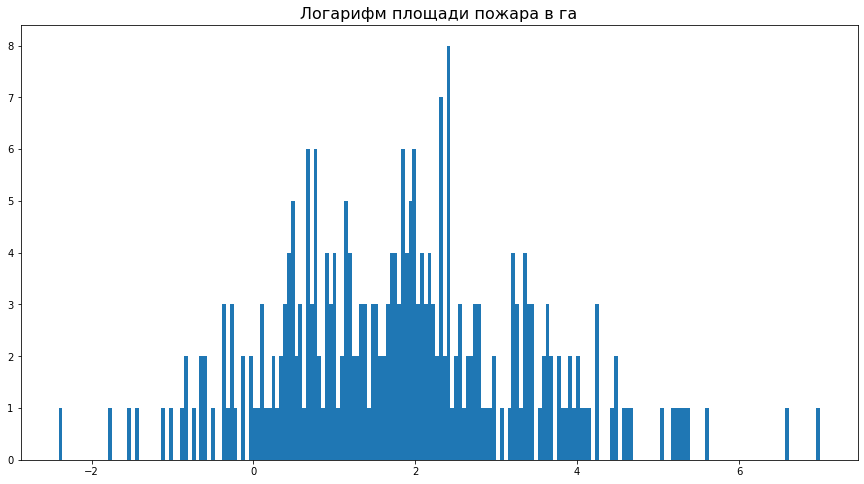

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.lgarea, bins=200)
plt.title('Логарифм площади пожара в га', fontdict={'fontsize':16})
plt.show()

Данные стали более сбалансированными и даже напоминают  визуально нормальное распределение

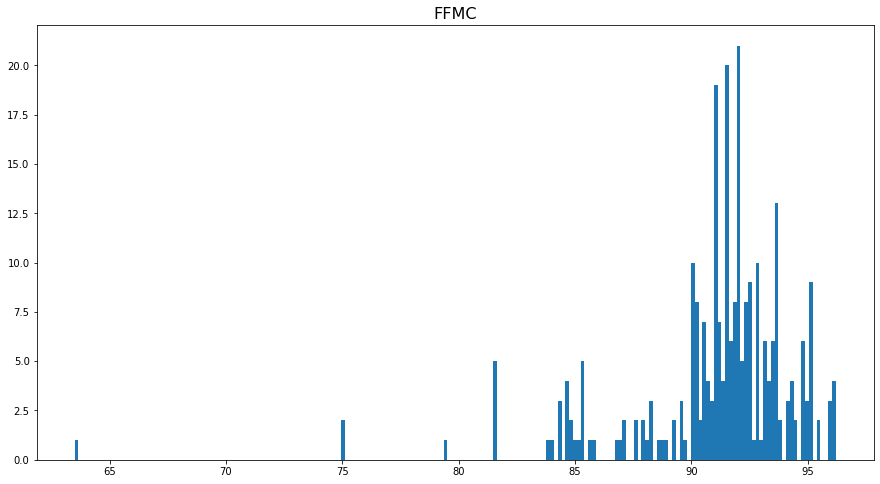

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.FFMC, bins=200)
plt.title('FFMC', fontdict={'fontsize':16})
plt.show()

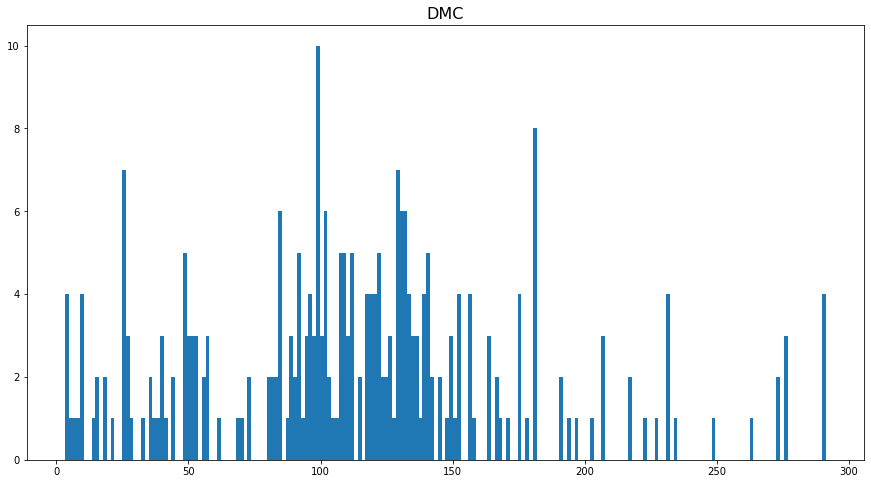

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.DMC, bins=200)
plt.title('DMC', fontdict={'fontsize':16})
plt.show()

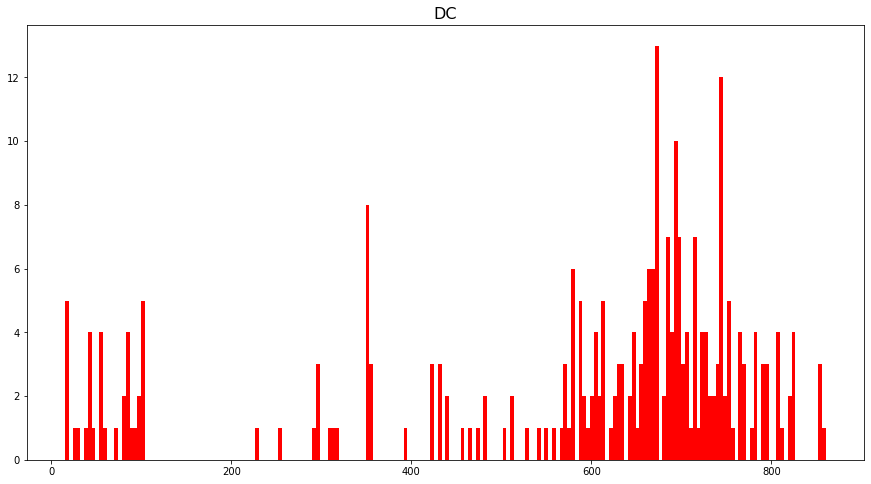

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.DC, bins=200, color='red')
plt.title('DC', fontdict={'fontsize':16})
plt.show()

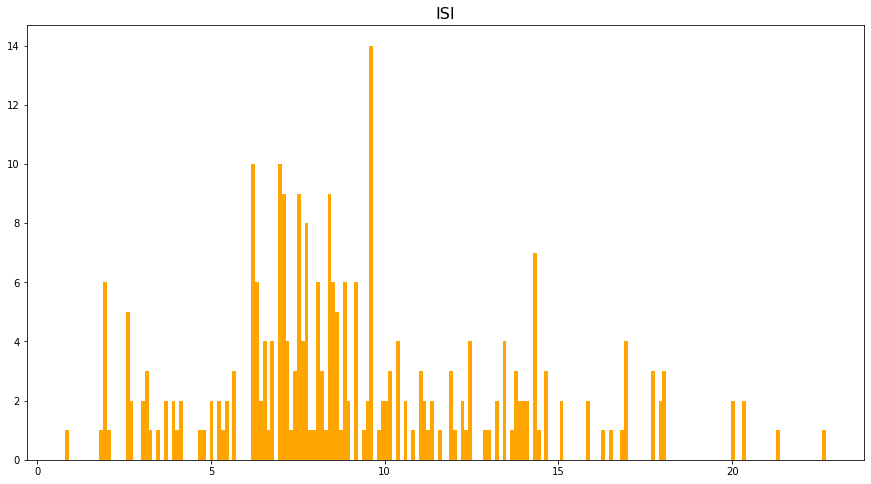

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.ISI, bins=200, color='orange')
plt.title('ISI', fontdict={'fontsize':16})
plt.show()

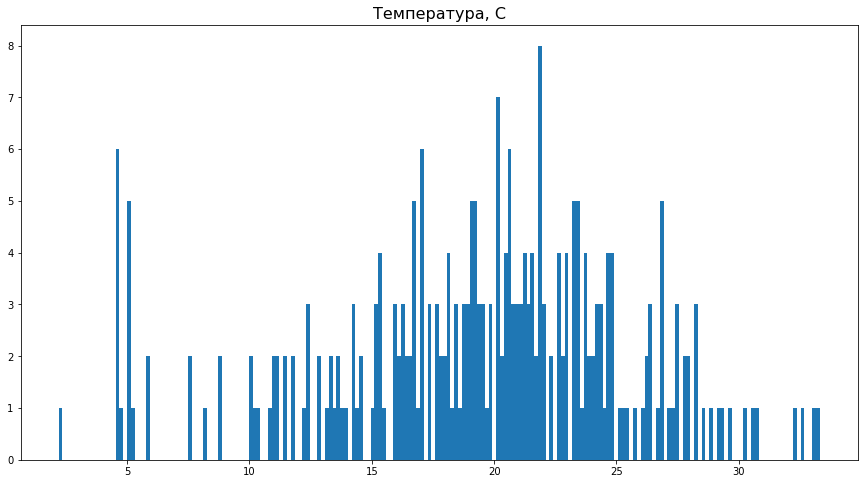

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.temp, bins=200)
plt.title('Температура, С', fontdict={'fontsize':16})
plt.show()

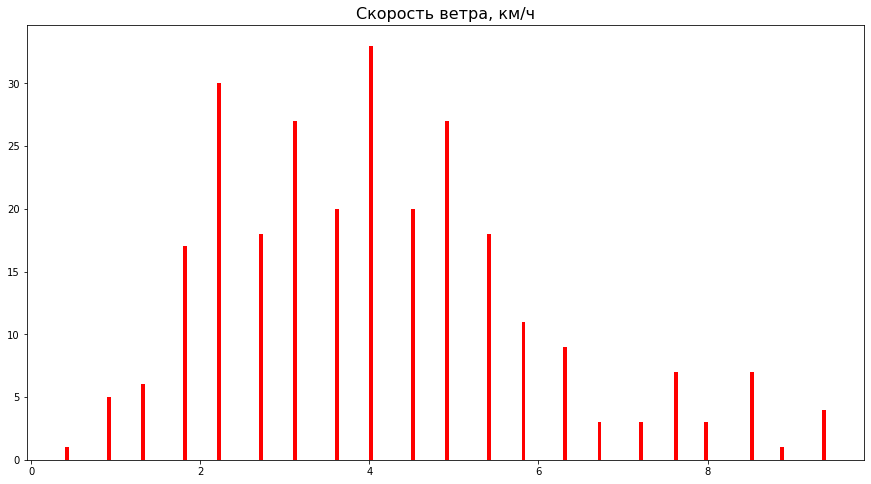

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.wind, bins=200, color='red')
plt.title('Скорость ветра, км/ч', fontdict={'fontsize':16})
plt.show()

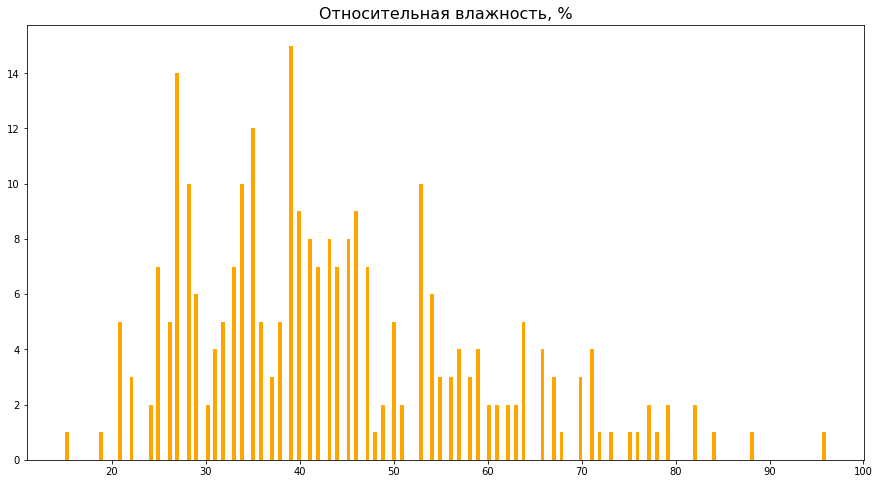

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.RH, bins=200, color='orange')
plt.title('Относительная влажность, %', fontdict={'fontsize':16})
plt.show()

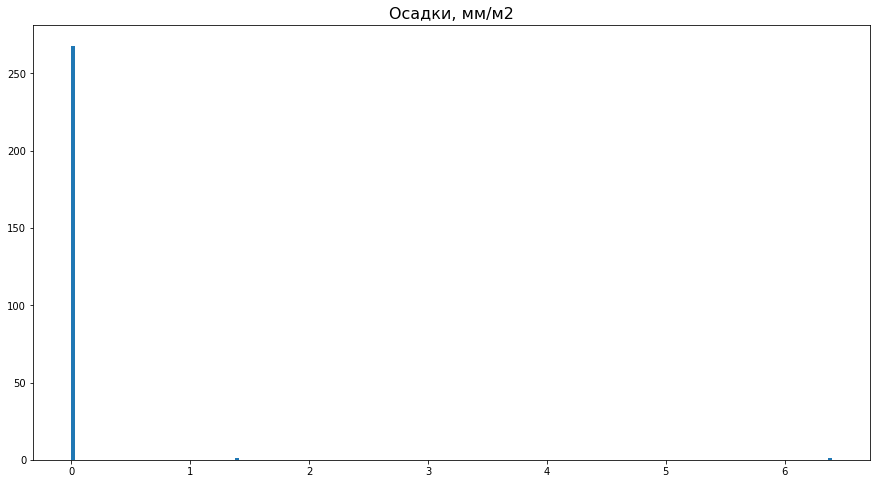

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.rain, bins=200)
plt.title('Осадки, мм/м2', fontdict={'fontsize':16})
plt.show()

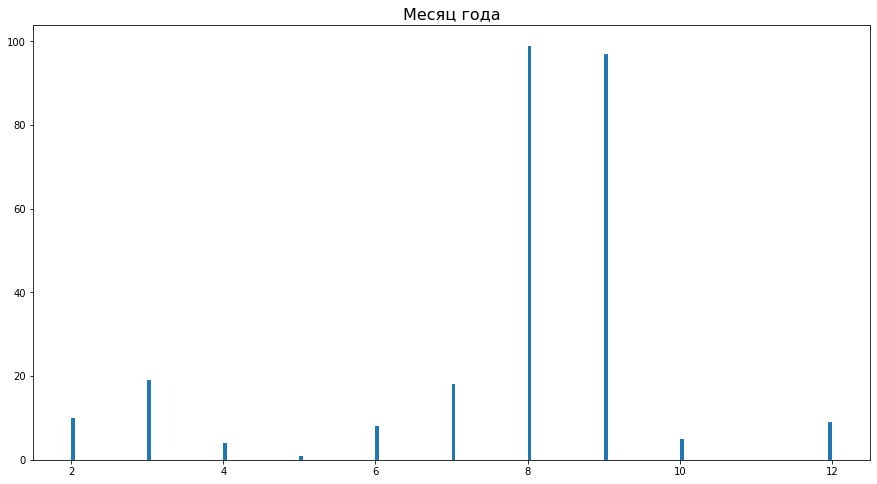

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.fmonth, bins=200)
plt.title('Месяц года', fontdict={'fontsize':16})
plt.show()

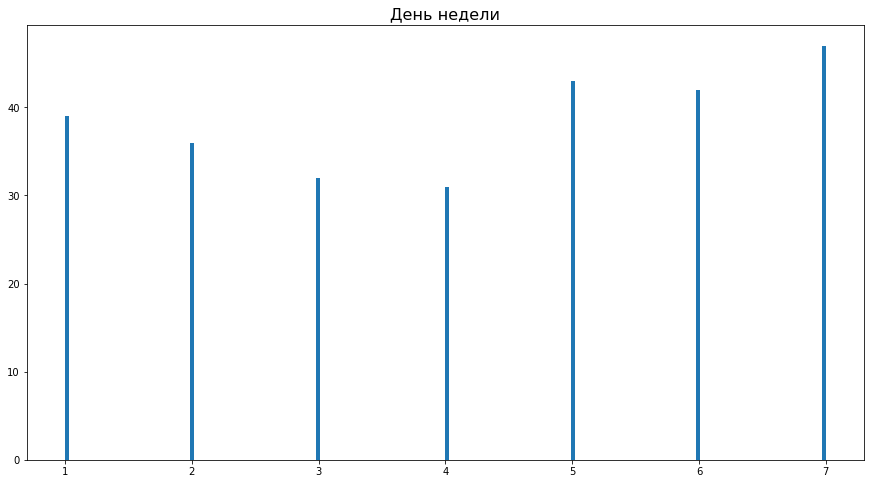

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.fday, bins=200)
plt.title('День недели', fontdict={'fontsize':16})
plt.show()

###**Отберите признаки, которые вы включите в модель. Кратко обоснуйте, почему выберёте каждый признак, и какой знак вы ожидаете получить при соответствующей переменной в линейной модели. Нет ограничений по количеству и набору переменных, важно, чтобы он был логичен и обоснован. Однaко желательно принять во внимание нелинейные признаки и признаки взаимодействия. Подготовьте описательные статистики данных. Обязательные: среднее, медиана, дисперсия, минимум, максимум. Дополнительные – любые по желанию. Например, отвергается ли гипотеза о нормальности теста Шапиро-Уилка и что-то ещё. Визуализируйте ваши признаки. Обязательно: гистограммы и ящики с усами. Иное – по желанию. Проинтерпретируйте графики. Есть ли в данных выбросы или иные аномалии? Если да, то как вы планируете с ними работать.**

Для определения признаков модели посмотрим на совместные распределения переменных.



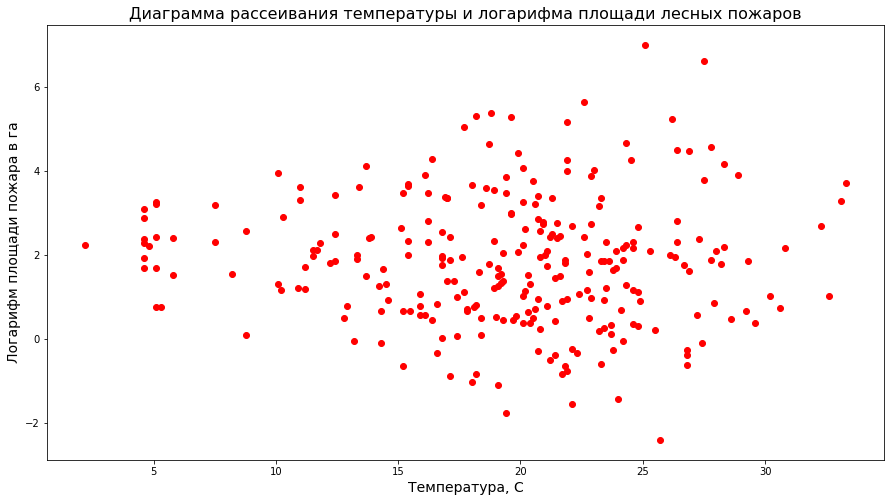

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.temp, forfires.lgarea, c = 'red', )
plt.xlabel('Температура, С', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания температуры и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

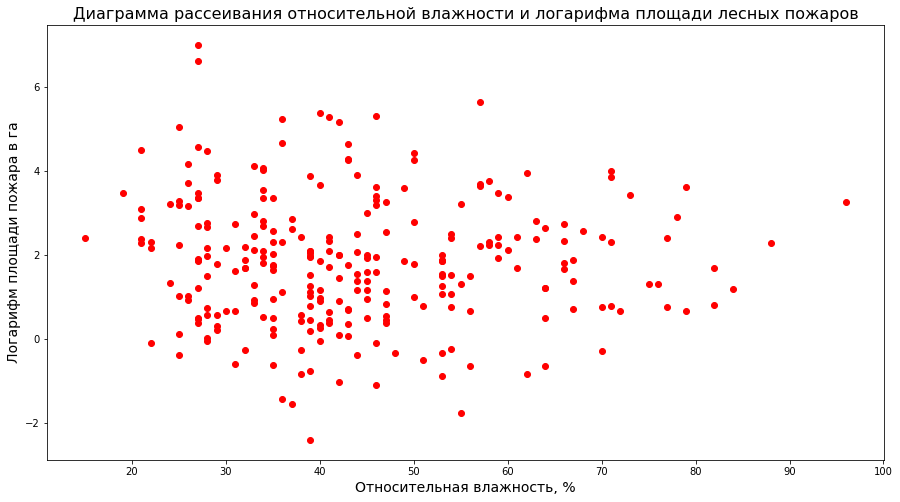

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.RH, forfires.lgarea, c = 'red', )
plt.xlabel('Относительная влажность, %', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания относительной влажности и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

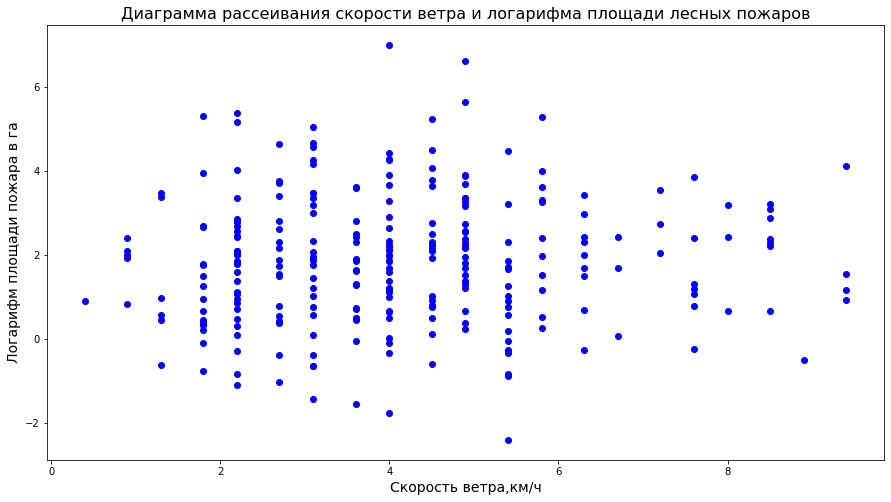

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.wind, forfires.lgarea, c = 'blue', )
plt.xlabel('Скорость ветра,км/ч', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания скорости ветра и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

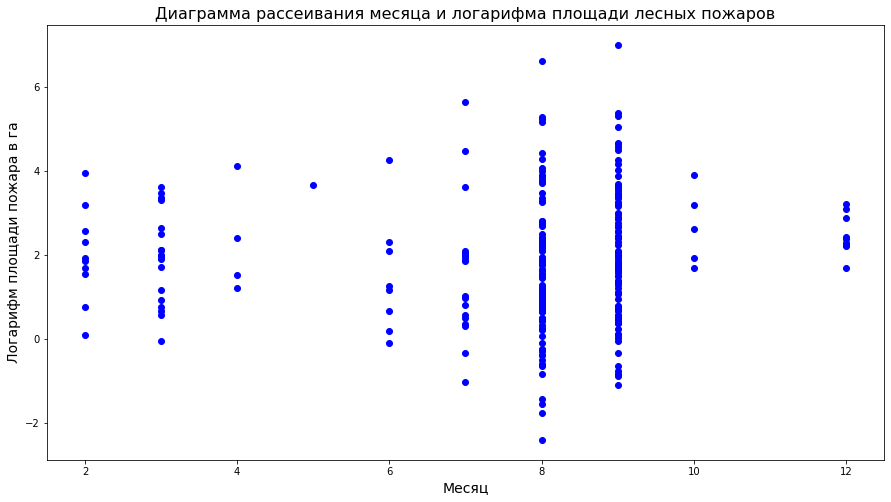

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.fmonth, forfires.lgarea, c = 'blue', )
plt.xlabel('Месяц', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания месяца и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

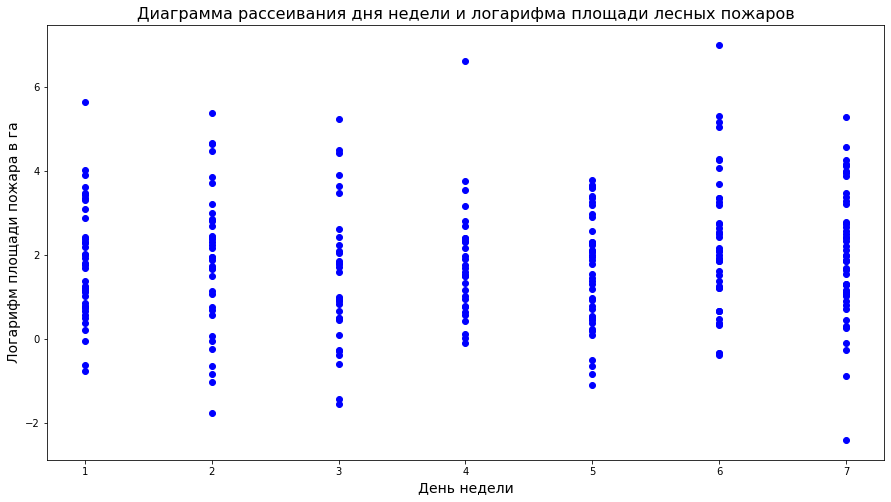

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.fday, forfires.lgarea, c = 'blue', )
plt.xlabel('День недели', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания дня недели и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

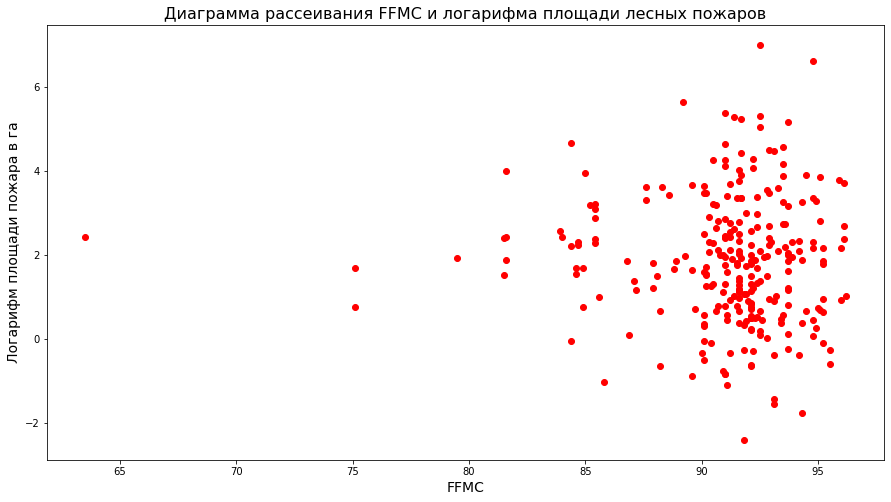

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.FFMC, forfires.lgarea, c = 'red', )
plt.xlabel('FFMC', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания FFMC и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

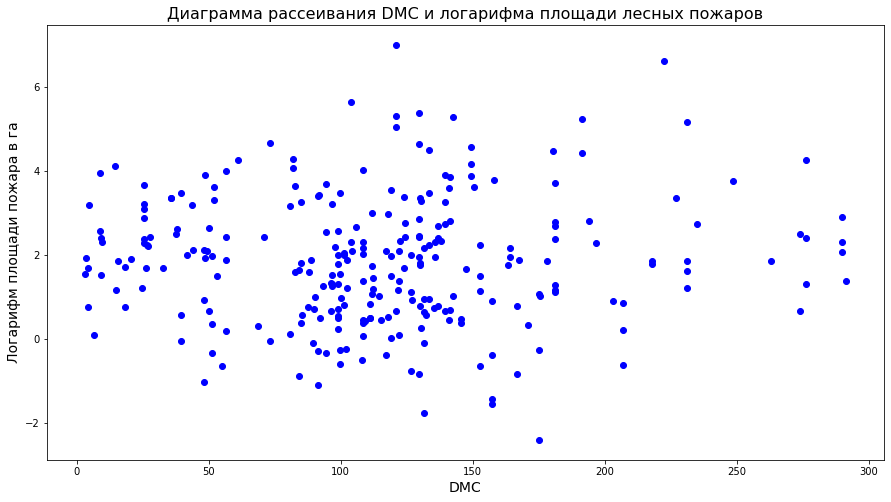

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.DMC, forfires.lgarea, c = 'blue', )
plt.xlabel('DMC', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания DMC и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

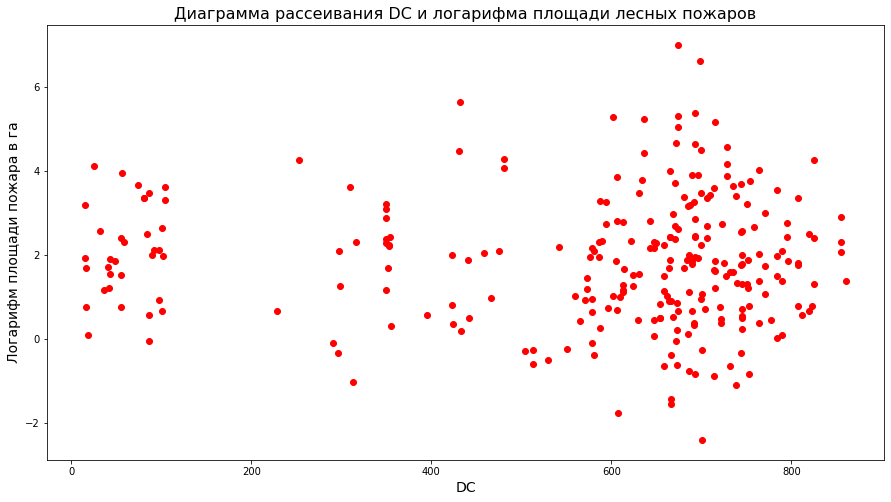

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.DC, forfires.lgarea, c = 'red', )
plt.xlabel('DC', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания DC и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

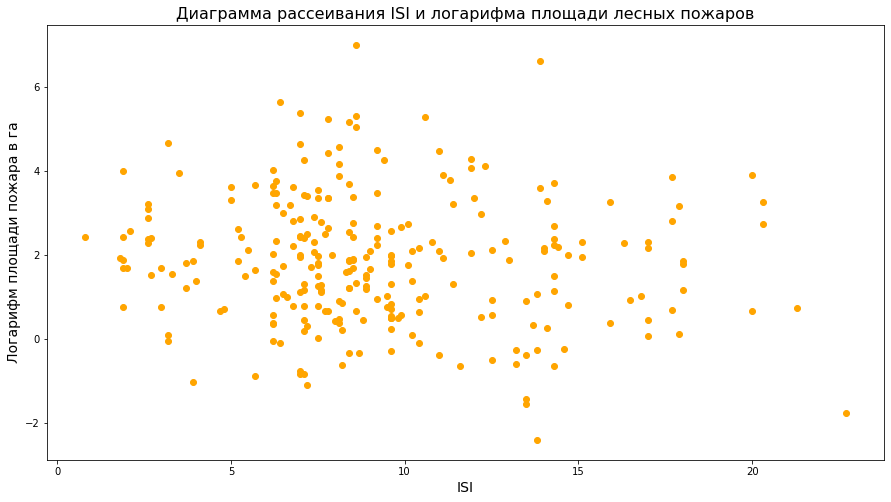

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.ISI, forfires.lgarea, c = 'orange', )
plt.xlabel('ISI', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания ISI и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.wind, forfires.lgarea, c = 'blue', )
plt.xlabel('Скорость ветра,км/ч', fontdict={'fontsize':14})
plt.ylabel('Логарифм площади пожара в га', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания скорости ветра и логарифма площади лесных пожаров', fontdict={'fontsize':16})
plt.show()

In [11]:
fire_model = forfires.drop(columns=['month', 'day'])

In [ ]:
fire_model.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fmonth,fday,lgarea
X,1.000000,0.497039,-0.072176,-0.104614,-0.161281,-0.054832,-0.081485,0.064763,0.042686,0.055996,0.070316,-0.153776,-0.030853,0.019832
Y,0.497039,1.000000,-0.021123,0.037533,-0.034065,-0.071683,0.031705,-0.039081,-0.037208,0.028215,0.050242,0.035781,-0.017230,-0.011719
FFMC,-0.072176,-0.021123,1.000000,0.480250,0.407638,0.704170,0.562256,-0.285990,-0.161384,0.081447,0.054323,0.229697,0.075092,-0.045433
DMC,-0.104614,0.037533,0.480250,1.000000,0.668926,0.329656,0.501643,0.027861,-0.137897,0.075206,0.089088,0.371871,0.129982,0.029488
DC,-0.161281,-0.034065,0.407638,0.668926,1.000000,0.256826,0.495703,-0.082217,-0.237593,0.036377,0.046735,0.799946,0.036271,-0.029071
ISI,-0.054832,-0.071683,0.704170,0.329656,0.256826,1.000000,0.466027,-0.148804,0.072652,0.067225,0.002121,0.122184,0.012677,-0.110253
temp,-0.081485,0.031705,0.562256,0.501643,0.495703,0.466027,1.000000,-0.497548,-0.320563,0.080988,0.110293,0.242570,0.053348,-0.034502
RH,0.064763,-0.039081,-0.285990,0.027861,-0.082217,-0.148804,-0.497548,1.000000,0.138490,0.099920,-0.104846,-0.145031,0.142722,-0.049684
wind,0.042686,-0.037208,-0.161384,-0.137897,-0.237593,0.072652,-0.320563,0.138490,1.000000,0.049112,0.002086,-0.052002,0.029816,0.054650
rain,0.055996,0.028215,0.081447,0.075206,0.036377,0.067225,0.080988,0.099920,0.049112,1.000000,-0.012901,0.008284,-0.057505,0.011832


Наибольшее значение корреляции по модулю между ПЛП и 1) температурой 2) относительной влажностью
3) DMC.

Наибольшее значение корреляции по модулю между лПЛП и 1) ISI 2) wind, 3) RH

Если судить о возможных переменных, с которыми может быть связана площадь лесных пожаров, то это
скорее всего температура - чем она выше, тем больше вероятность возгорания, также скорость ветра - 
чем она выше, тем больше может распространиться пожар, а также влажность - чем она меньше,
тем больше вероятность воспламенения лесного топлива. 
Анализ совместного распределения этих переменных показал невысокую степень линейной связи,
но в то же время возможную нелинейную связь с температурой, относительной влажностью, DMC 
В данных также представлено несколько погодных индексов, в основном они отражают, как мне
показалось, возможность возгорания различных растительных материалов в лесу, поэтому зависимость от
них может быть положительной. 

Предварительная спецификация будет включать: 

 температуру, 

  относительную влажность и 

   скорость ветра  - как непосредственные погодные характеристики, 

 индекс ISI, 

  DMC, 

   квадрат температуры.

Сразу стоит обратить внимание, что у показателя температуры довольно высокие значения корреляции
со всеми из этих признаков.
Я не стала включать показатели месяца и дня недели, поскольку считаю, что они скорее влияют
на вероятность возникновения пожара, а так как мы отобрали наблюдения с ненулевыми ПЛП, то здесь
влияние этих факторов вряд ли уже имеет большое значение

No handles with labels found to put in legend.


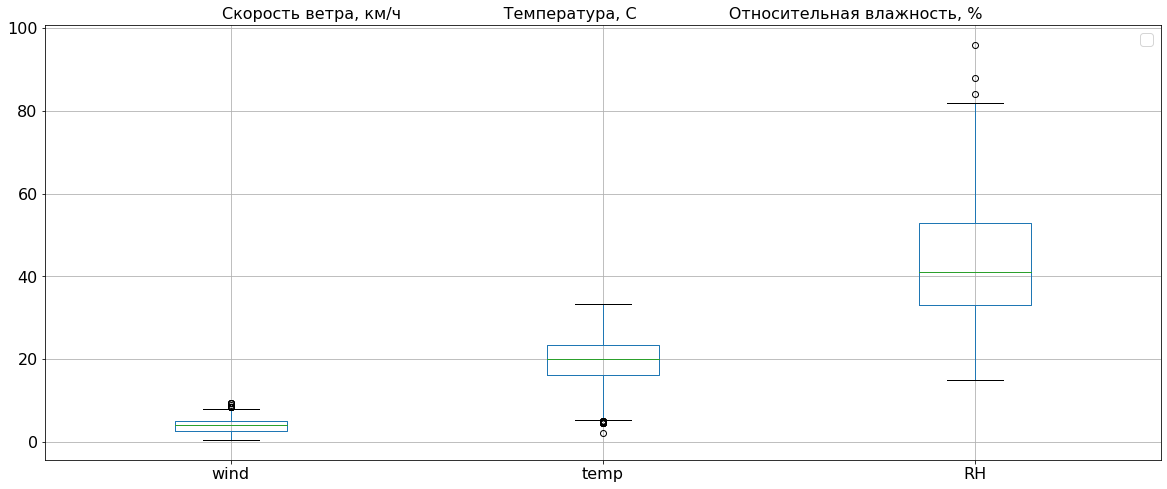

In [ ]:
plt.figure(figsize=(20, 8))
forfires.boxplot(column=['wind', 'temp', 'RH'], labels = ['Скорость ветра, км/ч', 'Температура, С', 'Относительная влажность, %'], fontsize=16)
plt.title('Скорость ветра, км/ч                    Температура, С                  Относительная влажность, %', fontdict={'fontsize':16})
plt.legend(fontsize=16)
plt.show()

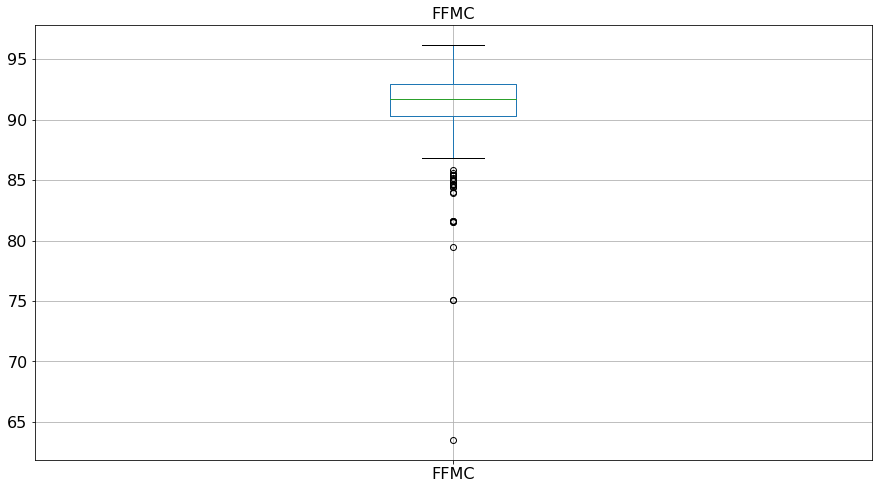

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['FFMC'], fontsize=16)
plt.title('FFMC', fontdict={'fontsize':16})
plt.show()

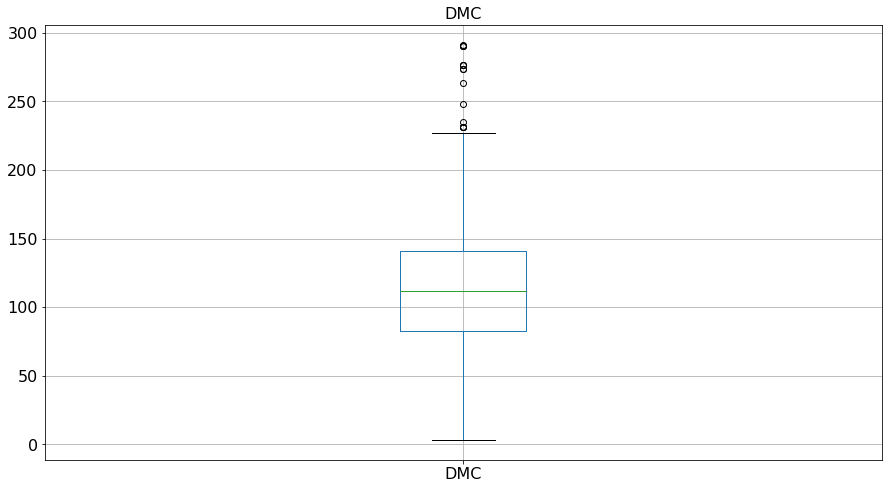

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['DMC'], fontsize=16)
plt.title('DMC', fontdict={'fontsize':16})
plt.show()

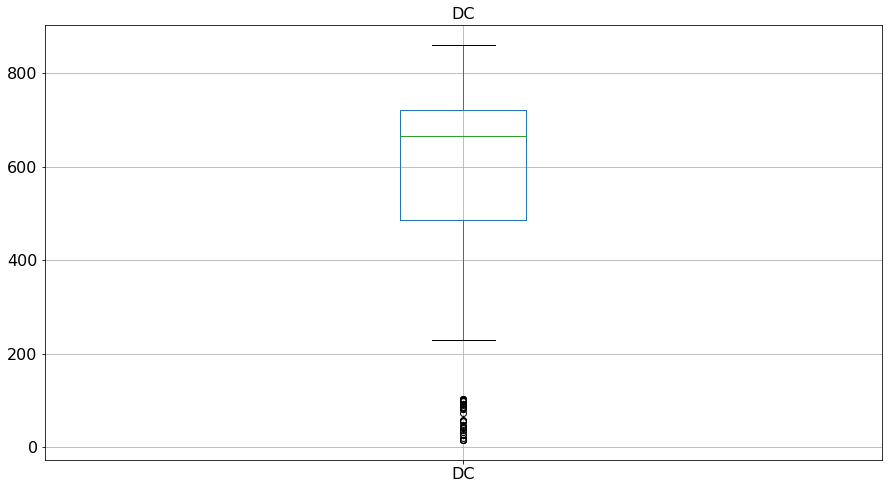

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['DC'], fontsize=16)
plt.title('DC', fontdict={'fontsize':16})
plt.show()

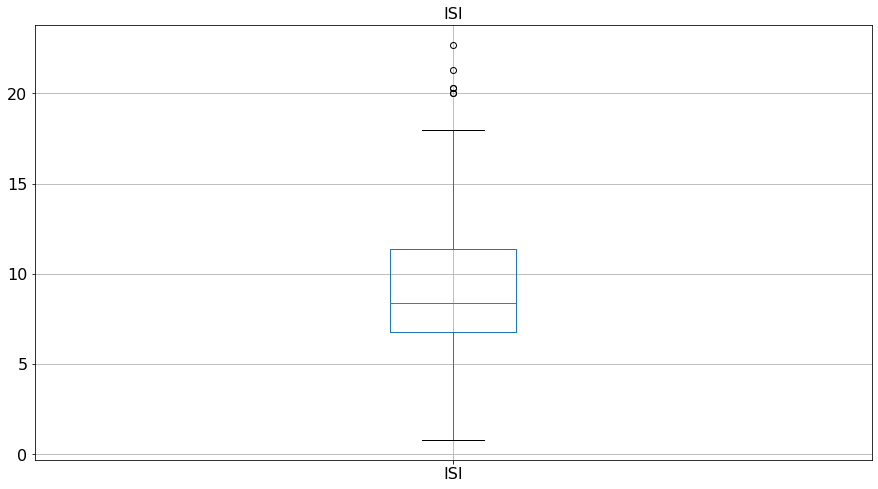

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['ISI'], fontsize=16)
plt.title('ISI', fontdict={'fontsize':16})
plt.show()

In [12]:
forfires['tempsq'] = forfires['temp'].apply(lambda x: x**2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


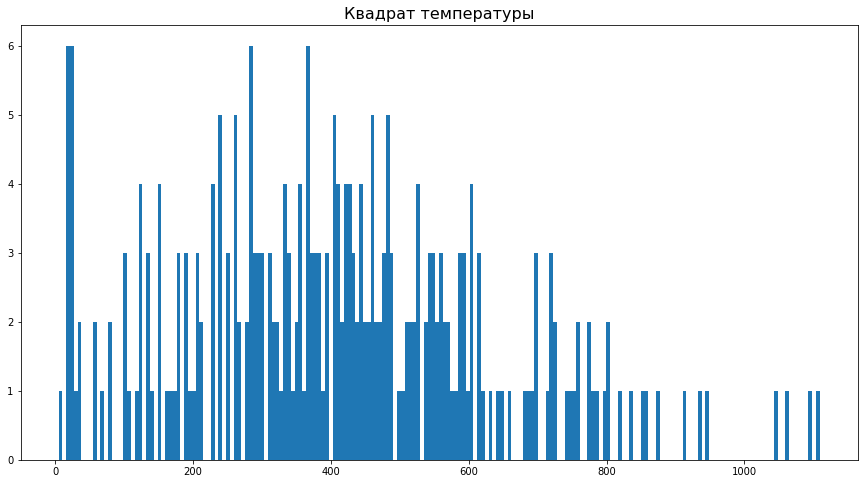

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(forfires.tempsq, bins=200)
plt.title('Квадрат температуры', fontdict={'fontsize':16})
plt.show()

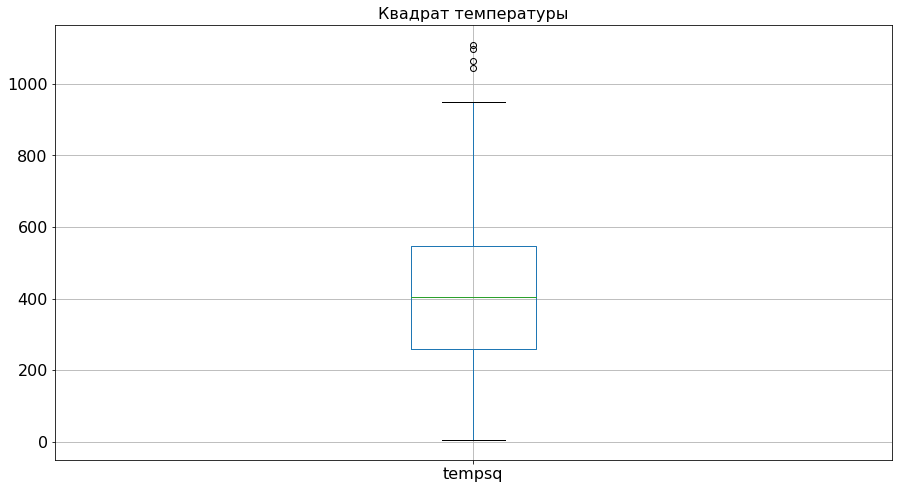

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['tempsq'], fontsize=16)
plt.title('Квадрат температуры', fontdict={'fontsize':16})
plt.show()

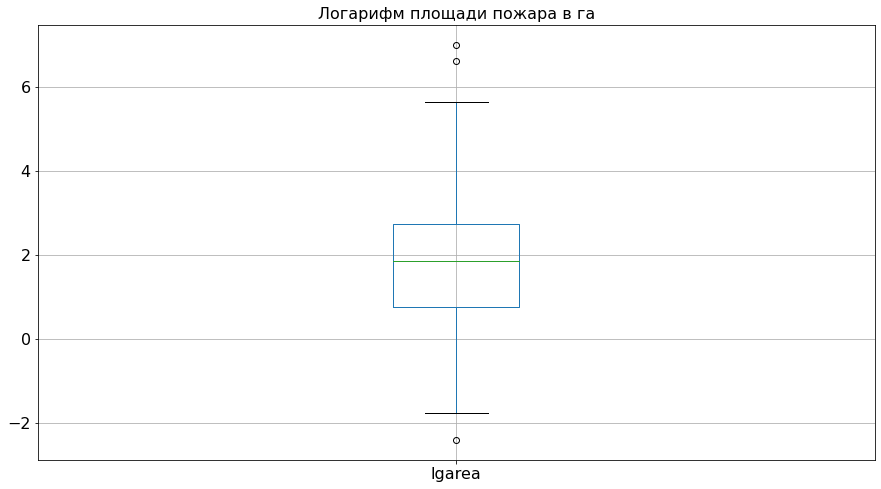

In [ ]:
plt.figure(figsize=(15, 8))
forfires.boxplot(column=['lgarea'], fontsize=16)
plt.title('Логарифм площади пожара в га', fontdict={'fontsize':16})
plt.show()

Посмотрев на данные, можно увидеть, что большинство из имеющихся параметров распределены относительны сбалансированно, однако по всем показателям встречаются выбросы либо с слишком низкими, либо со слишком высокими значениями показателей, как целевой, так и объясняющих переменных.

Выбросы по целевой переменной можно удалить, но по объясняющим переменным такого делать не следует.



**Описательные статистики данных**

In [21]:
forfires.describe()

,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fmonth,fday,lgarea,tempsq
count,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,1.0,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185,7.759259,4.174074,1.844831,410.963111
std,0.0,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635,2.115048,2.070162,1.526712,225.041908
min,1.0,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000,2.000000,1.000000,-2.407946,4.840000
25%,1.0,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000,8.000000,2.000000,0.760806,260.017500
50%,1.0,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000,8.000000,4.000000,1.851598,404.010000
75%,1.0,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500,9.000000,6.000000,2.735823,547.560000
max,1.0,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000,12.000000,7.000000,6.994703,1108.890000


Судя по значениям описательных статистик, разброс у выбранных параметров не очень высокий - все коэффициенты вариации меньше 1,
у всех параметров кроме температуры и логарифма площади пожаров медиана ниже среднего, что говорит о смещенности в сторону высоких
значений у этих показателей.

Можно также заметить, что логарифмирование целевой переменной значительно снизило её разброс (коэффициент вариации стал меньше 1).

In [22]:
forfires = forfires.drop(columns=['month', 'day'])

In [ ]:
from scipy.stats import shapiro

Проверим наши данные на нормальность

In [ ]:
for col in forfires.columns:
  if shapiro(forfires[col])[1] <= 0.05:
    print(col, 'Гипотеза о нормальности отвергается')
  else:
    print(col, 'Гипотеза о нормальности не отвергается')

X Гипотеза о нормальности отвергается
Y Гипотеза о нормальности отвергается
FFMC Гипотеза о нормальности отвергается
DMC Гипотеза о нормальности отвергается
DC Гипотеза о нормальности отвергается
ISI Гипотеза о нормальности отвергается
temp Гипотеза о нормальности отвергается
RH Гипотеза о нормальности отвергается
wind Гипотеза о нормальности отвергается
rain Гипотеза о нормальности отвергается
area Гипотеза о нормальности отвергается
fmonth Гипотеза о нормальности отвергается
fday Гипотеза о нормальности отвергается
lgarea Гипотеза о нормальности не отвергается
tempsq Гипотеза о нормальности отвергается


Все показатели, кроме логарифма площади пожаров, не подчиняется нормальному распределению

###**Проверьте, есть ли в ваших данных мультиколлинеарность. Используйте для этого VIF и CN. Если мультиколлинеарность присутствует, разберитесь с ней как настоящие ковбои.**

Создадим матрицу X регрессоров модели

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [23]:
forfires= add_constant(forfires)

In [ ]:
forfires.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fmonth,fday,lgarea,tempsq,const
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,7,2,-1.021651,324.00,1.0
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,9,2,-0.843970,470.89,1.0
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,9,1,-0.755023,479.61,1.0
141,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,8,3,-0.597837,542.89,1.0
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,8,5,-0.494296,449.44,1.0


In [24]:
X_fire = forfires.drop(columns=['X', 'Y', 'FFMC', 'DC', 'rain', 'area', 'lgarea', 'fmonth', 'fday'])

In [ ]:
X_fire.head()

,DMC,ISI,temp,RH,wind,tempsq,const
138,48.3,3.9,18.0,42,2.7,324.00,1.0
139,129.5,7.0,21.7,38,2.2,470.89,1.0
140,126.5,7.0,21.9,39,1.8,479.61,1.0
141,99.9,13.2,23.3,31,4.5,542.89,1.0
142,108.0,12.5,21.2,51,8.9,449.44,1.0


In [18]:
y_fire = forfires.lgarea

In [ ]:
np.linalg.cond(X_fire) #число обусловленности

4350.887985345495

In [ ]:
#https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
pd.Series([variance_inflation_factor(X_fire.values, i) 
               for i in range(X_fire.shape[1])], 
              index=X_fire.columns)

DMC        1.572634
ISI        1.406310
temp      21.674342
RH         1.578588
wind       1.242683
tempsq    19.619997
const     80.351080
dtype: float64

Можно заметить, судя по очень высокому числу обусловленности и достаточно высоким значениям VIF, что имеет место мультиколлинеарность.

С ней можно бороться разными способами: 1) пошаговое включение / исключение переменных

2) Метод главных компонент

3) регуляризация

4) функциональные преобразования переменных

В данном случае я воспользуюсь одним из самых простых способов - исключением переменных (не как ковбой, но как свободная фермерская корова Марта)

###**Оцените линейную модель и проинтерпретируйте результаты. Как можно объяснить знаки, которые не совпали с вашими исходными предположениями? Получились ли переменные значимы по отдельности и в целом? В данном пункте не следует ожидать высокого $R^2$ из-за особенностей данных. Игнорируйте этот факт. Такие мелочи не должны вас волновать, ведь вы занимаетесь наукой. Протестируйте остатки на нормальность любым из тестов.**

In [ ]:
lin_model = stm.OLS(y_fire, X_fire)
lin_model_result = lin_model.fit()
print(lin_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 lgarea   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.677
Date:                Fri, 19 Jun 2020   Prob (F-statistic):              0.127
Time:                        18:12:16   Log-Likelihood:                -491.79
No. Observations:                 270   AIC:                             997.6
Df Residuals:                     263   BIC:                             1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DMC            0.0032      0.002      1.701      0.0

Оценивание простой линейной модели дало не очень хорошие результаты:

Регрессия неадекватна судя по F-тесту,
большая часть переменных статистически незначима.

Судя по текущим оценкам зависимость от показателец DMC - duff moisture code, скорости ветра - положительные, а от ISI, относительной влажности отрицательный. Частично это вполне разумно: чем выше скорость ветра, тем больше вероятность распространения пожара на большую площадь; чем ниже влажность, тем больше сухого топлива в лесу может загореться. Менее интуитивным кажется зависимость от погодных индексов ISI и DMC, которая скорее всего уже должна отражаться в показателях погоды. таких как температура, влажность, скорость ветра.

Зависимость от температуры проинтерпретировать сложно: оба коэффициента незначимы, но судя сугубо по точечным оценкам зависимость немонотонная: сначала с с ростом температуры зависимость отрицательная, после - положительная.

Вдобавок к этому, знак зависимости от ISI - отрицательный, что, по моему мнению не очень логично, поскольку этот показатель отражает непосредственно характеристики пожара - initial spread.

Единственным значимым параметром оказалась константа.

Также здесь автоматически были проведены тесты Жарке-Бера на нормальность остатков. В данном случае p-value - 0,0531, что хоть и выше, чем 0,05, но не намного. Нулевая гипотеза о нормальности остатков на 5% уровне значимости не отвергается. 

Проведем отдельный тест на нормальность.

In [ ]:
if shapiro(lin_model_result.resid)[1] <= 0.05:
  print("Гипотеза о нормальности отвергается")
else:
  print("Гипотеза о нормальности не отвергается")

Гипотеза о нормальности не отвергается


Тест Шапиро-Уилка дал нам такой же результат

Чтобы избавиться от мультиколлинеарности уберем часть переменных, которые имеют высокие показатели VIF

In [20]:
X_fire_1.head()

,month,day,ISI,temp,RH,wind
138,jul,tue,3.9,18.0,42,2.7
139,sep,tue,7.0,21.7,38,2.2
140,sep,mon,7.0,21.9,39,1.8
141,aug,wed,13.2,23.3,31,4.5
142,aug,fri,12.5,21.2,51,8.9


In [25]:
X_fire_1 = X_fire.drop(columns=['const', 'tempsq', 'DMC'])
np.linalg.cond(X_fire_1) #число обусловленности значительно сократилось

25.845284501588914

In [ ]:
pd.Series([variance_inflation_factor(X_fire_1.values, i) 
               for i in range(X_fire_1.shape[1])], 
              index=X_fire_1.columns)

ISI     8.169827
temp    8.076773
RH      5.644684
wind    5.197824
dtype: float64

In [ ]:
X_fire_1.head()

,ISI,temp,RH,wind
138,3.9,18.0,42,2.7
139,7.0,21.7,38,2.2
140,7.0,21.9,39,1.8
141,13.2,23.3,31,4.5
142,12.5,21.2,51,8.9


In [26]:
lin_model1 = stm.OLS(y_fire, X_fire_1)
lin_model1_result = lin_model1.fit()
print(lin_model1_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 lgarea   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              93.96
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                    1.05e-49
Time:                        05:27:49   Log-Likelihood:                         -499.77
No. Observations:                 270   AIC:                                      1008.
Df Residuals:                     266   BIC:                                      1022.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Удаление части переменных привело к тому, что модель стала адекватной - p-value F-теста теперь около 0, сильно вырос R^2, все переменные значимые, поэтому мы можем их проинтерпретировать с большей уверенностью.

Зависимость от температуры и скорости ветра положительная - это не противоречит интуитивной оценке их возможного влияния, о котором говорилось выше.

Согласно модели зависимость от влажности слабо положительная, а от индекса ISI - отрицательная. Но такие знаки не очень сильно сходятся с моей логикой: по моему мнению, рост влажности при прочих равных должен был бы отрицательно влиять на площадь пожара, так как уменьшалась бы вероятность возгорания сухих материалов. Понять зависимость между ISI и целевой переменной достаточно сложно,поскольку это индикатор, сам по себе состоящий из нескольких физических параметров, отражающих состояние при пожаре.  


Автоматически проводимый тест Харке-Бера показал, что гипотеза о нормальности остатков не отвергается

Дополнительно проведем тест Шапиро-Уилка

In [ ]:
if shapiro(lin_model1_result.resid)[1] <= 0.05:
  print("Гипотеза о нормальности отвергается")
else:
  print("Гипотеза о нормальности не отвергается")

Гипотеза о нормальности не отвергается


Результат теста Шапиро-Уилка такой же.

###**Постройте следующие прогнозы: точечный, индивидуальный и для среднего. В качестве значений независимых переменных возьмите медианные значения наблюдений.**

In [144]:
X_new = np.median(X_fire_1, axis=0)
X_new

array([ 8.4, 20.1, 41. ,  4. ])

In [ ]:
print("Точечный прогноз логарифма площади лесного пожара", lin_model1_result.predict(X_new)[0])

Точечный прогноз логарифма площади лесного пожара 1.8453135748085492


Для среднего и индивидуального прогноза нам необходимы оценки дисперсий и ковариаций

In [136]:
lin_model1_result.cov_params()

,ISI,temp,RH,wind
ISI,0.000719,-0.000252,-0.000010,-0.000329
temp,-0.000252,0.000175,-0.000018,-0.000018
RH,-0.000010,-0.000018,0.000024,-0.000128
wind,-0.000329,-0.000018,-0.000128,0.002267


In [138]:
lin_model1_result.scale #оценка sigma^2

2.408631915151409

In [139]:
var_matrix = lin_model1_result.cov_params().values

## $Var(E(Y_{new}|X_{new})) = Var(X_{new}\hat{\beta}) = X_{new} Var(\hat{\beta})X_{new}^T  $

## $Var(Y_{new}|X_{new}) = Var(X_{new}\hat{\beta} + \epsilon_{new}) =  X_{new} Var(\hat{\beta})X_{new}^T + Var(\epsilon_{new})$

In [145]:
#Дисперсия прогноза для среднего
var_mean = np.dot(np.dot(X_new, var_matrix), X_new.transpose())
#Дисперсия для индивидуального прогноза
var_ind = var_mean + lin_model1_result.scale

In [148]:
#прогноз для среднего
left = lin_model1_result.predict(X_new)[0] - 1.96 * np.sqrt(var_mean)
right = lin_model1_result.predict(X_new)[0] + 1.96 * np.sqrt(var_mean)
print('Предиктивный интервал для среднего: [', left, ';', right, ']')
#индивидуальный прогноз
left_i = lin_model1_result.predict(X_new)[0] - 1.96 * np.sqrt(var_ind)
right_i = lin_model1_result.predict(X_new)[0] + 1.96 * np.sqrt(var_ind)
print('Предиктивный индивидуальный прогноз: [', left_i, ';', right_i, ']')

Предиктивный интервал для среднего: [ 1.6529826722897958 ; 2.037644477327303 ]
Предиктивный индивидуальный прогноз: [ -1.2026351684135754 ; 4.893262318030674 ]


###**Предположите, какие из регрессоров могут порождать гетероскедастичность. Обоснуйте идейно зависимость между этими переменными и дисперсией ошибок.**

Гетероскедастичость может быть вызвана как включенными в модель, так и исключенными переменными.

Сомнительно предполагать, что таким регрессором будет какой-то придуманный индекс, скорее это что-то из трех имеющихся признаков - влажность, температура или скорость ветра. 

Разная дисперсия ошибок, зависящая от какого-то регрессора, означает, что разброс значений площади пожара определенным образом зависит от этого фактора.

Судя по диаграммам рассеяния с ростом температуры растет разброс значений площади пожара, в то же время с понижением влажности разброс также растет. Также можно заметить, что разброс значений целевой переменной сильно разнится по месяцам - это скорее всего из-за того, что больше всего лесные пожары возникают летом / ранней осенью, а погодные условия при этом в разных сучаях совершенно отличные друг от друга. 

Наиболее разумной кажется зависимость от температуры, поскольку это, в отличие от влажности и скорости ветра, сезональный фактор. Большая часть наблюдений характеризуется достаточно высокими температурами, но хотя часть разброса объясняется влажностью и скоростью ветра, есть другие факторы, которые по-разному реагируют на температуру (возможно, природа лесных материалов с разной степенью устойчивости к высоким температурам). 

Похожим образом можно объяснить возможную гетероскедастичность, вызванную переменной влажности: чем ниже влажность, тем больше возможность возгорания сухого топлива, которое может сильно отличаться по своим физическим свойствам. 

###**Попытайтесь выявить гетероскедастичность по предположенным ранее переменным двумя способами: графически с помощью остатков регрессионной модели и вручную проведите тест Голдфельда-Квандта. Если не найдёте имплементации в любом из языков (маловероятно), реализуйте тест самостоятельно. Совпали ли результаты?**

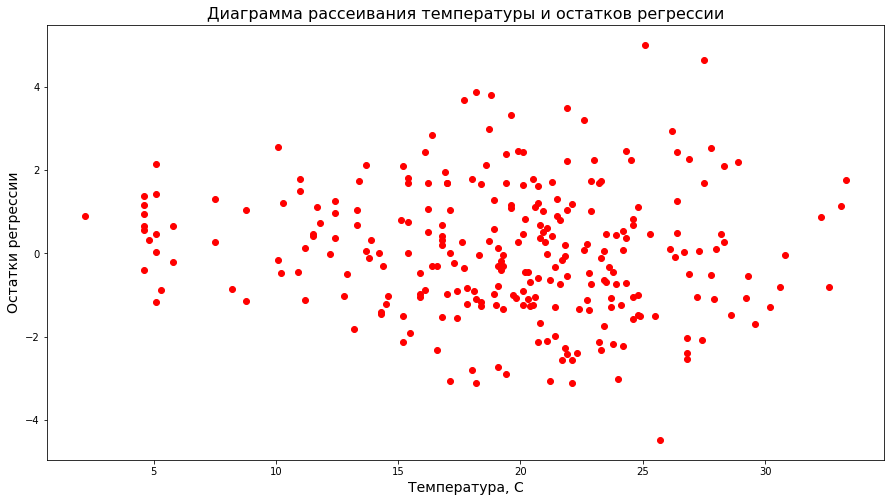

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.temp, lin_model1_result.resid, c = 'red')
plt.xlabel('Температура, С', fontdict={'fontsize':14})
plt.ylabel('Остатки регрессии', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания температуры и остатков регрессии', fontdict={'fontsize':16})
plt.show()

Можно заметить, что с ростом температуры разброс остатков несколько увеличивается.

In [27]:
temp = X_fire_1.temp.values.reshape(X_fire_1.shape[0], 1)

In [28]:
from statsmodels.stats.api import het_goldfeldquandt
test1 = het_goldfeldquandt(lin_model1_result.resid, temp, alternative='increasing')
test2 = het_goldfeldquandt(lin_model1_result.resid, temp, alternative='two-sided')
test3 = het_goldfeldquandt(lin_model1_result.resid, temp, alternative='decreasing')
print('P-value гипотезы о том, что дисперсия второго сэмпла больше, чем у первого', test1[1])
print('P-value гипотезы о том, что дисперсия второго сэмпла не равна дисперсии первого', test2[1])
print('P-value гипотезы о том, что дисперсия второго сэмпла меньше, чем у первого', test3[1])

P-value гипотезы о том, что дисперсия второго сэмпла больше, чем у первого 0.9953492170126116
P-value гипотезы о том, что дисперсия второго сэмпла не равна дисперсии первого 0.009301565974776792
P-value гипотезы о том, что дисперсия второго сэмпла меньше, чем у первого 0.004650782987388396


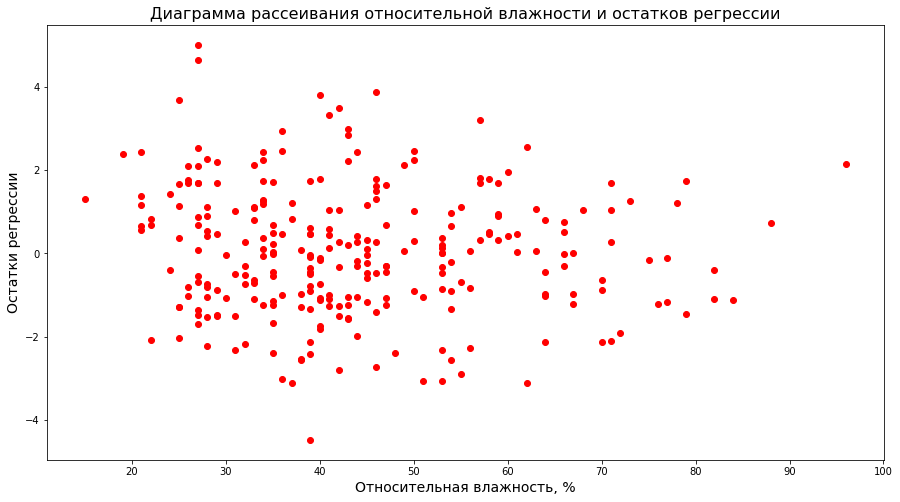

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(forfires.RH, lin_model1_result.resid, c = 'red')
plt.xlabel('Относительная влажность, %', fontdict={'fontsize':14})
plt.ylabel('Остатки регрессии', fontdict={'fontsize':14})
plt.title('Диаграмма рассеивания относительной влажности и остатков регрессии', fontdict={'fontsize':16})
plt.show()

Можно заметить, что с ростом влажности разброс остатков немного сокращается.

In [29]:
rh =  X_fire_1.RH.values.reshape(X_fire_1.shape[0], 1)

In [30]:
test1 = het_goldfeldquandt(lin_model1_result.resid, rh, alternative='increasing')
test2 = het_goldfeldquandt(lin_model1_result.resid, rh, alternative='two-sided')
test3 = het_goldfeldquandt(lin_model1_result.resid, rh, alternative='decreasing')
print('P-value гипотезы о том, что дисперсия второго сэмпла больше, чем у первого', test1[1])
print('P-value гипотезы о том, что дисперсия второго сэмпла не равна дисперсии первого', test2[1])
print('P-value гипотезы о том, что дисперсия второго сэмпла меньше, чем у первого', test3[1])

P-value гипотезы о том, что дисперсия второго сэмпла больше, чем у первого 0.9953417023453763
P-value гипотезы о том, что дисперсия второго сэмпла не равна дисперсии первого 0.00931659530924733
P-value гипотезы о том, что дисперсия второго сэмпла меньше, чем у первого 0.004658297654623665


Гипотезы о гомоскедастичности отвергается в пользу альтернативной гипотезы о том, что дисперсия второго сэмпла выше.

Можно говорить о том, что результат совпал с визуальным анализом (разброс действительно отличается) для переменной температуры - с ростом ее значений разброс остатков выше (а по результатам теста дисперсия тоже больше). 

Результат теста для переменной относительной влажности такой же, хотя судя по графику можно было бы предположить об отрицательной зависимости между дисперсией и показателем RH

###**Вне зависимости от того, обнаружена ли гетероскедастичность в предыдущих пунктах, вручную (в матрицах) оцените модель взвешенного МНК. Разумеется, предположите, что ковариационная матрица ошибок диагональна. Засчитывается как использование пакетных реализаций, так и решение вручную в матрицах, но в обоих случаях надо предоставить коэффициенты, стандартные ошибки и p-value. Изменились ли результаты значимости по сравнению с обычной линейной моделью?**

Я реализую взвешенный МНК при предположении о следущей форме гетероскедастичности:

$\sigma_{\epsilon i}^2$ ~ $temp_i$

Вручную создам матрицу $\Omega^{-1/2}$, диагональные элементы которой будут пропорциональны $\frac{1}{\sqrt{temp_i}}$

После этого создам матрицы $Y^* = \Omega^{-1/2} \cdot Y, X^* = \Omega^{-1/2} \cdot X$

In [32]:
X_fire_1.head()

,ISI,temp,RH,wind
138,3.9,18.0,42,2.7
139,7.0,21.7,38,2.2
140,7.0,21.9,39,1.8
141,13.2,23.3,31,4.5
142,12.5,21.2,51,8.9


In [31]:
X_init = X_fire_1.values
Omega = np.zeros((X_init.shape[0], X_init.shape[0]))

In [33]:
for i in range(X_init.shape[0]):
  Omega[i,i] = 1 / np.sqrt(X_init[i,2])

In [35]:
X_new = np.dot(Omega, X_init)
y_new = np.dot(Omega, y_fire)

In [36]:
model_lin = stm.OLS(y_new, X_new)
model_lin_result = model_lin.fit()
print(model_lin_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.591
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              95.93
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                    2.08e-50
Time:                        06:12:15   Log-Likelihood:                         -10.323
No. Observations:                 270   AIC:                                      28.65
Df Residuals:                     266   BIC:                                      43.04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Проведем также пакетную реализацию и сравним результаты

In [38]:
wls_model = stm.WLS(y_fire, X_fire_1, weights=1/X_init[:,2])
wls_model_result = wls_model.fit()
print(wls_model_result.summary())

                                 WLS Regression Results                                
Dep. Variable:                 lgarea   R-squared (uncentered):                   0.591
Model:                            WLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              95.93
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                    2.08e-50
Time:                        06:19:44   Log-Likelihood:                         -512.61
No. Observations:                 270   AIC:                                      1033.
Df Residuals:                     266   BIC:                                      1048.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Результаты ручной и пакетной реализаций совпали:

Переменная относительной влажности стала статистически незначимой, остальные - значимы.

Однако в этой модели гипотеза о нормальности остатков отвергается, поэтому не очень корректно смотреть на доверительные интервалы, основанные на распределении Стьюдента.

###**Вычислите робастные ошибки в форме Уайта (HC0), лучше вместо пакетных реализаций построить вручную. Поясните метод расчёта (можно на словах, главное - идея). Вычислите p-value для всех переменных. Изменились ли результаты значимости по сравнению с обычной линейной моделью?**

Бонус 1 балл Повторите для HC3

Идея оценок стандартных ошибок Уайта очень простая: предполагаем, что можно оценить дисперсии ошибок по квадратам остатков. Оценка ковариационной матрицы ошибок здесь диагональная, а диагональные элементы - квадраты остатков соответствующих наблюдений.

Это такая наивная оценка  неисправленной выборочной дисперсии по одному наблюдению 

$\hat{\Omega}_{ii} = e_i^2 $

$\hat{Var(\hat{\beta})} = (X^TX)^{-1}X^T\hat{\Omega}X(X^TX)^{-1}$

In [43]:
resid_lin = lin_model1_result.resid.values

In [45]:
resid_lin[1]

-2.5506443651385267

In [46]:
omega_new = np.zeros((X_init.shape[0], X_init.shape[0]))

In [48]:
for i in range(X_init.shape[0]):
  omega_new[i, i] = resid_lin[i]**2

In [52]:
xi = X_init.transpose()

In [54]:
xtx = np.dot(xi, X_init)

In [55]:
xtx

array([[ 27365.8 ,  51061.87, 105859.  ,  10343.85],
       [ 51061.87, 110960.04, 215553.5 ,  20440.77],
       [105859.  , 215553.5 , 577576.  ,  49624.6 ],
       [ 10343.85,  20440.77,  49624.6 ,   5522.83]])

In [56]:
inv_xtx = np.linalg.inv(xtx)

In [57]:
matr1 = np.dot(inv_xtx, xi)
matr2 = np.dot(matr1, omega_new)
variance_betas = np.dot(matr2, matr1.transpose())

In [58]:
variance_betas # Оценка HC0

array([[ 7.14042597e-04, -2.78894290e-04, -3.38938616e-06,
        -2.50725322e-04],
       [-2.78894290e-04,  1.83378232e-04, -1.81781954e-05,
         4.46923621e-05],
       [-3.38938616e-06, -1.81781954e-05,  2.03430714e-05,
        -1.26222069e-04],
       [-2.50725322e-04,  4.46923621e-05, -1.26222069e-04,
         1.83147099e-03]])

Найдем p-value для линейной модели (OLS)

In [63]:
from scipy.stats import t

In [62]:
df = lin_model1_result.df_resid
df

266.0

In [64]:
coef_ISI = lin_model1_result.params['ISI']
std_err_i = variance_betas[0,0]
tstat_i = coef_ISI/std_err_i
print(t.sf(np.abs(tstat_i), df)*2 )

1.032909326985127e-190


In [69]:
np.sqrt(variance_betas)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.02672158,        nan,        nan,        nan],
       [       nan, 0.01354172,        nan, 0.00668523],
       [       nan,        nan, 0.00451033,        nan],
       [       nan, 0.00668523,        nan, 0.04279569]])

In [66]:
lin_model1_result.HC0_se

ISI     0.026722
temp    0.013542
RH      0.004510
wind    0.042796
dtype: float64

Результаты ручной оценки совпали с оценками встроенными

In [67]:
#ISI
coef_ISI = lin_model1_result.params['ISI']
std_err_i = np.sqrt(variance_betas[0,0])
tstat_i = coef_ISI/std_err_i
print('P-value гипотезы о незначимости коэффициента перед ISI', t.sf(np.abs(tstat_i), df)*2 )
#temp
coef_temp = lin_model1_result.params['temp']
std_err_t = np.sqrt(variance_betas[1,1])
tstat_t = coef_temp/std_err_t
print('P-value гипотезы о незначимости коэффициента перед параметром температуры', t.sf(np.abs(tstat_t), df)*2 )
#RH
coef_rh = lin_model1_result.params['RH']
std_err_r = np.sqrt(variance_betas[2,2])
tstat_r = coef_rh/std_err_r
print('P-value гипотезы о незначимости коэффициента перед параметром относительной влажности', t.sf(np.abs(tstat_r), df)*2 )
#wind
coef_wind = lin_model1_result.params['wind']
std_err_w = np.sqrt(variance_betas[3,3])
tstat_w = coef_wind/std_err_w
print('P-value гипотезы о незначимости коэффициента перед переменной скорости ветра', t.sf(np.abs(tstat_w), df)*2 )

P-value гипотезы о незначимости коэффициента перед ISI 0.029484640817768016
P-value гипотезы о незначимости коэффициента перед параметром температуры 7.577502198110415e-06
P-value гипотезы о незначимости коэффициента перед параметром относительной влажности 0.01386074134290159
P-value гипотезы о незначимости коэффициента перед переменной скорости ветра 0.0002503651776953605


Все коэффициенты оказались статистически значимыми, как и в обычной модели

###**Преобразуйте ваши независимые переменные с помощью PCA. Какую долю дисперсии объясняют две первые главные компоненты? Постройте линейную регрессию зависимой переменной на две первые главные компоненты и проинтерпретируйте результат. Повысилась ли объясняющая способность модели относительно обычной линейной? Значимы ли переменные?**

In [70]:
from statsmodels.multivariate.pca import PCA

In [71]:
pca1 = PCA(X_init)

In [72]:
pca1.coeff

array([[  9.72678888,  14.86831072, -11.64242896,  -6.75193733],
       [-10.77462685,  -0.17497361,  -1.64402448, -13.07234355],
       [  6.41618076,   1.33272707,  10.93751863,  -6.68179303],
       [ -4.25788902,   6.86487867,   3.48162571,   2.97973464]])

In [85]:
pca1.projection.shape

(270, 4)

Для нахождения доли дисперсии найдем сосбтвенные значения матрицы $X^TX$

In [76]:
pca1.eigenvals

array([496.81189535, 289.71218169, 207.21920884,  86.25671412])

In [79]:
var_frac = (pca1.eigenvals[0] + pca1.eigenvals[1]) / np.sum(pca1.eigenvals)
print('Доля дисперсии, объясняемая первыми двумя главными компонентами:', var_frac)

Доля дисперсии, объясняемая первыми двумя главными компонентами: 0.7282630343019696


In [86]:
X_pca = pca1.projection[:, :2]

In [87]:
model_pca = stm.OLS(y_fire, X_pca)
model_pca_result = model_pca.fit()
print(model_pca_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 lgarea   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.526
Method:                 Least Squares   F-statistic:                              150.9
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                    1.28e-44
Time:                        09:35:39   Log-Likelihood:                         -516.86
No. Observations:                 270   AIC:                                      1038.
Df Residuals:                     268   BIC:                                      1045.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Применение метода главных компонент привело к тому, что R^2 сократился (это я считаю неудивительным, поскольку выбранные нами компоненты объясняют лишь около 70% дисперсии исходных факторов). 

Коэффициент перед первой главной компонентой статистически незначим, а перед второй, наоброт значим.

Лоическую или интуитивную интерпретацию самих коэффициентов подобрать сложно, поскольку обе компоненты являются линейными комбинациями исходных, изменение которых будет влиять на обе компоненты сразу, возможно поэтому коэффициент перед одной из компонент так близок к нулю (влияние достаточно объяснить через оставшийся фактор)

###**С помощью метода максимального правдоподобия получите оценки линейной модели. Для этого в явном виде в матричной форме выпишите функцию правдоподобия.Далее найдите оценки коэффициентов (дисперсии ошибок – по желанию) двумя способами:**

###**(a) Решите задачу аналитически (совпадёт с МНК, просто перепишите предыдущий результат)**

###**(b) Решите задачу с помощью методов численного дифференцирования. В случаях когда градиент трудно выписать в явной форме, его можно вычислить приближённо, через приращения. Пример кода для функции нескольких переменных приложен в письме с домашним заданием, обобщите его на векторный случай.Напишите функцию, вычисляющую приближённый вектор-градиент правдоподобия в точке. Так как эта задача выпуклая, отлично справится обычный градиентный спуск без дополнительных наворотов.**

Если кто-то забыл или не знал,
что это такое:
https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
Похожи ли результаты?

Метод максимального правдоподобия основывается на предположении о нормальности случайных ошибок (предположим также гомоскедастичность):

# $L(\beta, \sigma^2) = \left(\frac{1}{\sqrt{2\pi \sigma^2}}\right)^n \cdot e^{-\frac{1}{2\sigma^2}||y - X \beta||^2}$

# $l(\beta, \sigma^2) = -\frac{1}{2\sigma^2}||y - X \beta||^2 -\frac{n}{2}\ln{2\pi} - \frac{n}{2}\ln{\sigma^2}$

# $l'_{\beta} = -\frac{1}{2\sigma^2} [(y - X \beta)^T(y - X \beta)]'_{\beta}$

# $d(y^Ty - y^TX\beta -\beta^TX^Ty + \beta^TX^TX\beta) = $

# $-y^TX(d\beta) - (d\beta^T) X^Ty +(d\beta^T) X^TX\beta + \beta^TX^TX(d\beta) =$

# $-2y^TX(d\beta) + 2 \beta^TX^TX(d\beta) = 2(\beta^TX^TX - y^TX)d\beta$

# $l'_{\beta} = -\frac{1}{2\sigma^2} \cdot 2(\beta^TX^TX - y^TX)d\beta = \frac{1}{\sigma^2}(y^TX - \beta^TX^TX) d\beta$

Оценки коэффициентов получаются такими же, как в МНК:

# $\hat{\beta} = (X^TX)^{-1}X^Ty$

# $l'_{\sigma^2} = \frac{1}{2\sigma^4} ||y - X \beta||^2 - \frac{n}{2\sigma^2} = \frac{1}{2\sigma^2}(\frac{||y - X \beta||^2 }{\sigma^2} - n)$

In [90]:
beta_ml = lin_model1_result.params
beta_ml

ISI    -0.058487
temp    0.061843
RH      0.011173
wind    0.158861
dtype: float64

Так как у нас задача максимизации - мы бюдем двигаться в сторону градиента

In [120]:
def grad_calc(X,y, beta_old, sigma2_old, step=0.005):
  step = step
  n = X.shape[0]
  y = y.reshape(n, 1)
  xtx = np.dot(X.transpose(), X)
  grad_beta = (np.dot(y.transpose(), X) - np.dot(beta_old.transpose(), xtx)) / sigma2_old
  resid = y - np.dot(X, beta_old)
  
  grad_sigma = ((np.dot(resid.transpose(), resid)/sigma2_old) - n)/(2*sigma2_old**2)
  beta_new = beta_old + step*grad_beta.transpose()
  sigma2_new = sigma2_old + step*grad_sigma
  return (beta_new, sigma2_new)

In [127]:
epsilon = 0.0001
def maxlikelihood(X,y,step, max_iter=100):
  step = step
  n = X.shape[0]
  k = X.shape[1]
  y = y.reshape(n, 1)
  beta_start = np.random.random(size=(k, 1))
  sigma2_start = np.random.random_sample()+0.001
  beta_n, sigma2_n = grad_calc(X,y, beta_start, sigma2_start, step=step)
  i = 1
  while np.sum(abs(beta_n - beta_start) > epsilon) > 0 and abs(sigma2_n - sigma2_start) > epsilon:
    if i > max_iter:
      break
    else:
      beta_n, sigma2_n = grad_calc(X,y, beta_n, sigma2_n, step=step)
      i = i + 1
  return (beta_n, sigma2_n)
  

In [130]:
np.random.seed(1000)

Результаты применения ММП

In [131]:
maxlikelihood(X_fire_1, y_fire.values, 0.005, max_iter=2000)

(array([[-0.05577043],
        [ 0.06166324],
        [ 0.0119198 ],
        [ 0.14517654]]), array([[2730.05568536]]))

##**Нам нужны оценки ММП**

In [133]:
beta_ml = lin_model1_result.params
beta_ml

ISI    -0.058487
temp    0.061843
RH      0.011173
wind    0.158861
dtype: float64

##*Камилла: у нас есть оценки ММП дома*

##**Оценки ММП дома:**

In [132]:
beta_homemade_ml = maxlikelihood(X_fire_1, y_fire.values, 0.005, max_iter=2000)
beta_homemade_ml

(array([[-0.05865276],
        [ 0.06188691],
        [ 0.01115537],
        [ 0.15923487]]), array([[2969.22338751]]))

Здесь рандомизация прошла настолько хорошо, что полученные численным методом оценки ММП очень похожи на оценки, реализованные в Питоне

Но если запускать по-новому, в силу рандомности начальных параметров, можно не прийти в другое место (так как я добавила максимальное число итераций)


In [ ]:
# Для проверки результата:
beta_homemade_ml_check = maxlikelihood(X_fire_1, y_fire.values, 0.005, max_iter=2000)
beta_homemade_ml_check